In [77]:
import nltk
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import optimizers

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Keras NN Multiple Classification

In [16]:
df = pd.read_csv('Tweet.csv')
df_up = pd.read_csv('Upsampled.csv')

In [17]:
df = df.drop(columns='Unnamed: 0')

In [20]:
df.head(5) # normal 

,Tweet,Platform,Emotion,Positive_Bin
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,1


In [22]:
df_up = df_up.drop(columns='Unnamed: 0')

In [23]:
df_up.head(5) # upsampled for increased number of negative tweets

,Tweet,Platform,Emotion,Positive_Bin
0,At #sxsw #tapworthy iPad Design Headaches - av...,iPad,Negative emotion,0
1,RT @mention Part of Journalsim is the support ...,NaN,Negative emotion,0
2,Fuck the iphone! RT @mention New #UberSocial f...,iPhone,Negative emotion,0
3,#SXSW 2011: Novelty of iPad news apps fades fa...,iPad,Negative emotion,0
4,New #SXSW rule: no more ooing and ahing over y...,iPad,Negative emotion,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tweet         3548 non-null   object
 1   Platform      3191 non-null   object
 2   Emotion       3548 non-null   object
 3   Positive_Bin  3548 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 111.0+ KB


In [27]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tweet         3500 non-null   object
 1   Platform      3171 non-null   object
 2   Emotion       3500 non-null   object
 3   Positive_Bin  3500 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 109.5+ KB


In [28]:
df_up['Positive_Bin'].value_counts()

1    2500
0    1000
Name: Positive_Bin, dtype: int64

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
sid = SentimentIntensityAnalyzer()

In [33]:
df_up['scores'] = df_up['Tweet'].apply(lambda review:sid.polarity_scores(review))

In [35]:
df_up['compound'] = df_up['scores'].apply(lambda d:d['compound'])

In [45]:
df_up['comp_score'] = df_up['compound'].apply(lambda score: 1 if score >= 0 else 0)

In [46]:
df_up.head()

,Tweet,Platform,Emotion,Positive_Bin,scores,compound,comp_score
0,At #sxsw #tapworthy iPad Design Headaches - av...,iPad,Negative emotion,0,"{'neg': 0.153, 'neu': 0.764, 'pos': 0.083, 'co...",-0.2732,0
1,RT @mention Part of Journalsim is the support ...,NaN,Negative emotion,0,"{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...",0.8796,1
2,Fuck the iphone! RT @mention New #UberSocial f...,iPhone,Negative emotion,0,"{'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'comp...",-0.5848,0
3,#SXSW 2011: Novelty of iPad news apps fades fa...,iPad,Negative emotion,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
4,New #SXSW rule: no more ooing and ahing over y...,iPad,Negative emotion,0,"{'neg': 0.083, 'neu': 0.83, 'pos': 0.087, 'com...",0.0258,1


In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [55]:
accuracy_score(df_up['Positive_Bin'],df_up['comp_score'])

0.7537142857142857

In [56]:
print(classification_report(df_up['Positive_Bin'],df_up['comp_score']))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47      1000
           1       0.79      0.90      0.84      2500

    accuracy                           0.75      3500
   macro avg       0.70      0.64      0.66      3500
weighted avg       0.74      0.75      0.73      3500



In [58]:
confusion_matrix(df_up['Positive_Bin'],df_up['comp_score'])

array([[ 389,  611],
       [ 251, 2249]], dtype=int64)

In [12]:
full_df = pd.read_csv('Full_DF')

In [13]:
full_df.head()

,Unnamed: 0,Tweet,Platform,Emotion,Uncertain,Negative,No Emotion,Positive
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0,1,0,0
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,0,0,0,1
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,0,0,0,1
3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0,1,0,0
4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,0,0,0,1


In [14]:
full_df = full_df.drop(columns='Unnamed: 0')

In [79]:
full_df.head(10)
full_df = full_df.dropna()

In [91]:
tweets = full_df['Tweet']
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
print('sequences type: ' , type(sequences))

sequences type:  <class 'list'>


In [92]:
one_hot_results = tokenizer.texts_to_matrix(tweets, mode='binary')
print('one_hot_results type:', type(one_hot_results))

one_hot_results type: <class 'numpy.ndarray'>


In [93]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index)) 

Found 5963 unique tokens.


In [94]:
# Our coded data
print('Dimensions of our coded results:', np.shape(one_hot_results)) 

Dimensions of our coded results: (3291, 5000)


In [95]:
print(y.shape)
print(one_hot_results.shape)

(9093, 4, 2)
(3291, 5000)


In [140]:
emotion = full_df['Emotion']

# Initialize
le = preprocessing.LabelEncoder() 
le.fit(emotion)
print('Original class labels:')
print(list(le.classes_))
print('\n')
emotion_cat = le.transform(emotion)  

# If you wish to retrieve the original descriptive labels post production
# list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) 

print('New product labels:')
print(emotion_cat)
print('\n')

# Each row will be all zeros except for the category for that observation 
print('One hot labels; 4 binary columns, one for each of the categories.') 
product_onehot = to_categorical(emotion_cat)
print(product_onehot)
print('\n')

print('One hot labels shape:')
print(np.shape(product_onehot))

Original class labels:
["I can't tell", 'Negative emotion', 'No emotion toward brand or product', 'Positive emotion']


New product labels:
[1 3 3 ... 1 3 3]


One hot labels; 4 binary columns, one for each of the categories.
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


One hot labels shape:
(3291, 4)


In [118]:
random.seed(123)
test_index = random.sample(range(1,3200), 1500)

test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)

label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

print('Test label shape:', np.shape(label_test))
print('Train label shape:', np.shape(label_train))
print('Test shape:', np.shape(test))
print('Train shape:', np.shape(train))

Test label shape: (1500, 4)
Train label shape: (1791, 4)
Test shape: (1500, 5000)
Train shape: (1791, 5000)


In [124]:
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential

In [125]:
# embedding_size = 128
# model.add(Embedding(embedding_size))
# model.add(Dense(16,input_dim=2, activation='relu'))
# model.add(LSTM(8,input_dim=2, activation='relu'))
# model.add(Dense(2, activation='sigmoid'))
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['precision'])
# model.summary()

In [130]:
# Initialize a sequential model
model = models.Sequential()
# Two layers with relu activation
model.add(layers.Dense(50, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [131]:
history = model.fit(train,
                    label_train,
                    epochs=20,
                    batch_size=32)

Epoch 1/20
56/56 [==============================] - 0s 2ms/step - loss: 0.9940 - acc: 0.8064
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.4601 - acc: 0.8163
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.3160 - acc: 0.8780
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.2006 - acc: 0.9437
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.1196 - acc: 0.9588
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0732 - acc: 0.9769
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0459 - acc: 0.9889
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0375 - acc: 0.9918
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0245 - acc: 0.9946
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0243 - acc: 0.9944
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - lo

In [132]:
history_dict = history.history

In [133]:
history_dict.keys()

dict_keys(['loss', 'acc'])

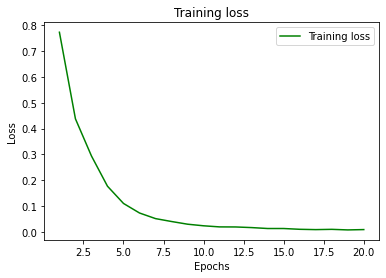

In [134]:
history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

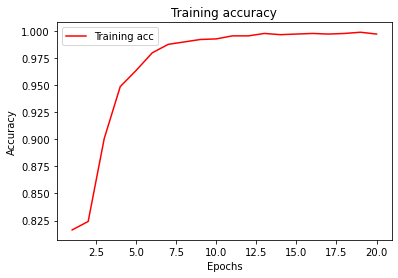

In [135]:
# Plot the training accuracy vs the number of epochs

acc_values = history_dict['acc'] 

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [136]:
# Output (probability) predictions for the test set 
y_hat_test = model.predict(test) 

In [138]:
# Print the loss and accuracy for the training set 
results_train = model.evaluate(train, label_train)
results_train

56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - acc: 0.9983


[0.0056903669610619545, 0.9983249306678772]

In [139]:
results_test = model.evaluate(test, label_test)
results_test # model predicts on the test data with 81% accuracy. 

47/47 [==============================] - 0s 1ms/step - loss: 1.1781 - acc: 0.8153


[1.1780710220336914, 0.8153333067893982]